# RandomForest Classifier with Spambase


## Import required packages

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import matplotlib.pylab as plt

from dmba import classificationSummary, gainsChart, liftChart

Spambase is a dataset used for detecting email spam based on a number of characteristics.

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### Data Loading and Preprocessing

In [ ]:
data_df = pd.???('spambase.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Display the first 10 rows of the dataset



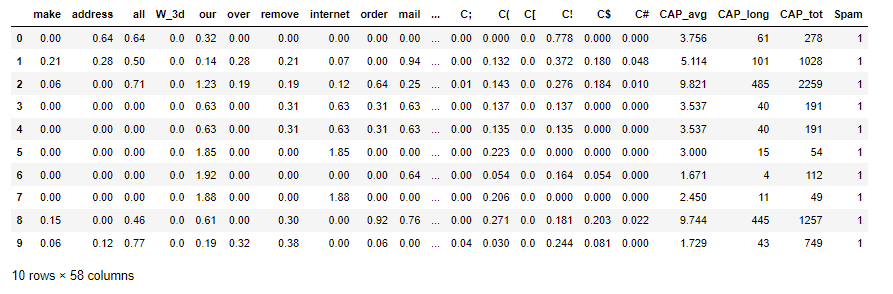

In [ ]:
# Display the descriptive statistics of the numeric variables



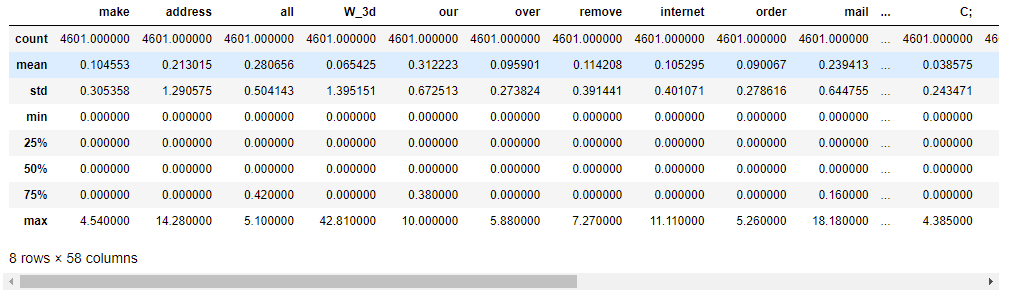

In [ ]:
# Display the names of the variables, non-null counts, and datatypes



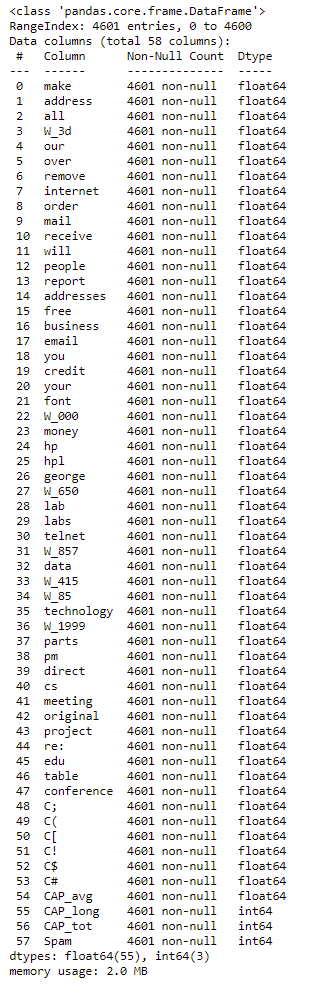

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ","

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar="Spam",
    dfte = data_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

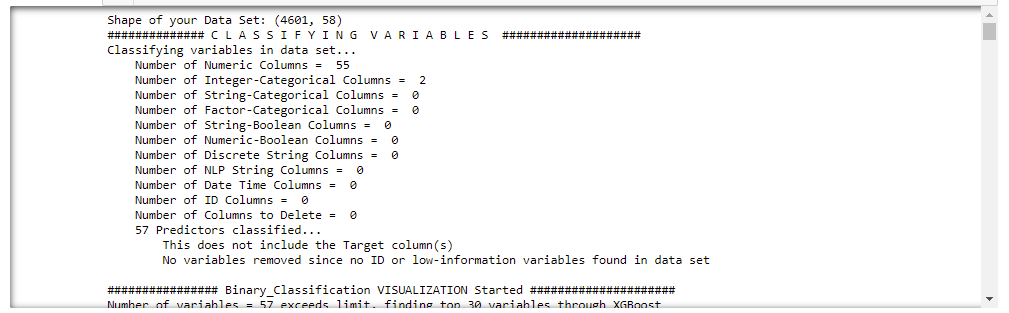

In [ ]:
# Create a y response variable and an X collection of predictors

y = data_df[???]
X = data_df.drop(columns=[???])

In [ ]:
# Ensure that the target variable is categorical and integer

y = y.astype(???).cat.codes

y.value_counts()

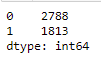

In [ ]:
# Split the data into training and test sets (holdout approach)

???, ???, ???, ??? = ???(X, y, test_size=0.5, stratify=???, random_state=1)

### Use RandomForest with GridSearch

In [ ]:
# user grid search to find optimized tree

param_grid = {
    'n_estimators': [300, 500, 700], 
    'criterion' : ['gini'],
    'oob_score': ['True'],
    'min_impurity_decrease': [0, 0.001, 0.01, 0.1], 
    'min_samples_split': [4, 10, 20], 
    'max_depth':[10, 20, 30],
}

In [ ]:
gridSearch = GridSearchCV(???, ???, cv=???, n_jobs=6)

gridSearch.???(???, ???)

print('Initial parameters: ', gridSearch.???)

rfTree = gridSearch.???

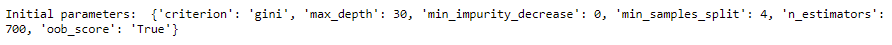

In [ ]:
# Display the out of bag scores

print(rfTree.???)

In [ ]:
# Display the confusion matrices for training and test data

classificationSummary(???, rfTree.???(train_X))

classificationSummary(test_y, rfTree.???(???))

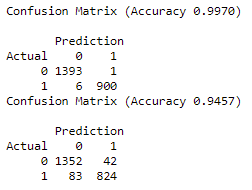

In [ ]:
# Display the classification report on the test data

classes = rfTree.predict(???)

print(metrics.classification_report(???, classes))

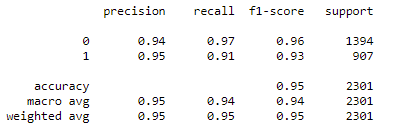

#### Refine the hyperparameter values to improve the model performance.

In [ ]:
param_grid = {
    'n_estimators': [700, 900], 
    'criterion' : ['gini'],
    'oob_score': ['True'],
    'min_impurity_decrease': [0.001], 
    'min_samples_split': [2, 4, 6], 
    'max_depth':[30, 40, 50],
}

In [ ]:
gridSearch = GridSearchCV(RandomForestClassifier(), ???, cv=10, n_jobs=6)

???.???(train_X, train_y)

print('Initial parameters: ', gridSearch.???)

rfTree = gridSearch.???

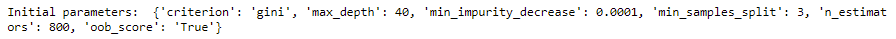

In [ ]:
print(rfTree.oob_score_)

In [ ]:
# Display the confusion matrices

classificationSummary(???, ???.predict(???))

classificationSummary(???, rfTree.???(test_X))

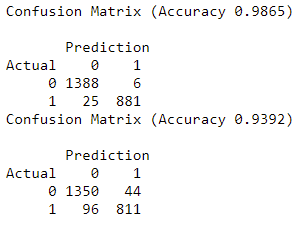

In [ ]:
classes = rfTree.???(test_X)

print(metrics.classification_report(???, classes))

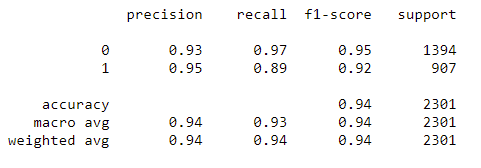

#### Create and display lift and gain charts (check model performance)

In [ ]:
%matplotlib inline

rfTree_pred = rfTree.predict(???)
rfTree_proba = rfTree.predict_proba(???)

rfTree_result = pd.DataFrame({'actual': test_y, 
                             'p(0)': [p[0] for p in rfTree_proba],
                             'p(1)': [p[1] for p in rfTree_proba],
                             'predicted': rfTree_pred })

df = rfTree_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

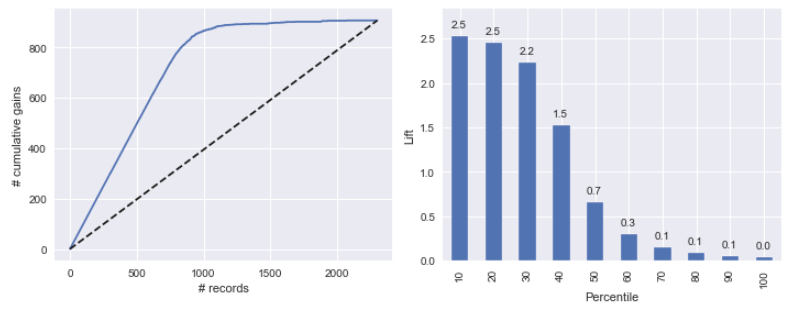

#### Create and display the ROC chart (check model performance using Positive predictive accuracy)

In [ ]:
rfTree_pred = rfTree.predict(???)
rfTree_proba = rfTree.predict_proba(???)

preds = rfTree_proba[:,1]

fpr, tpr, threshold = metrics.roc_curve(test_y, preds)

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFTree_ROC')
plt.show()

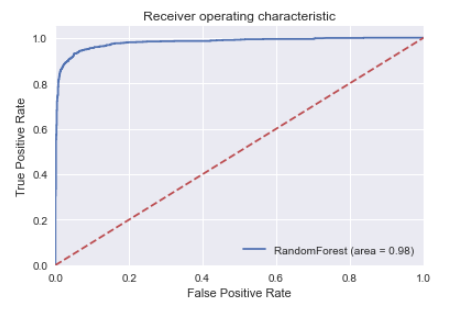

#### Create and display the feature importances (identifies the predictors that were responsible for the largest reduction in impurity)

In [ ]:
%matplotlib inline
import numpy as np

importances = rfTree.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfTree.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df1 = df.sort_values('importance', ascending=False)
print(df1)

df = df.sort_values('importance', ascending=True)
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

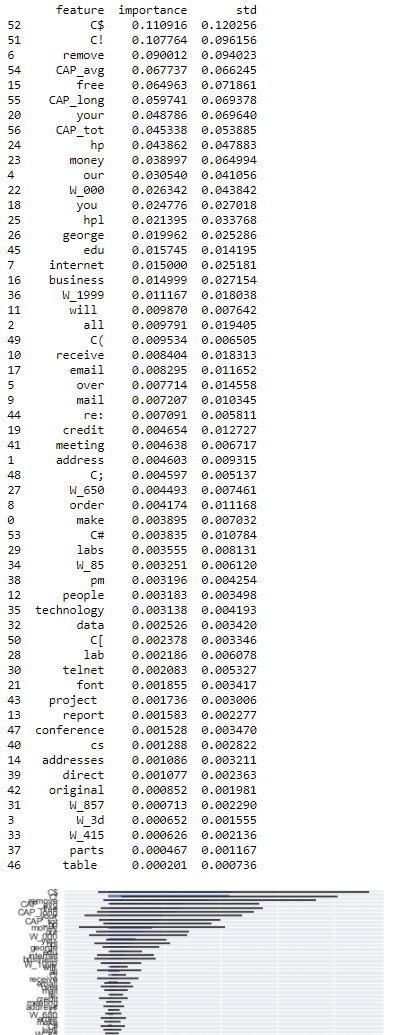